**Deliverable 1**

By: Eric Berenguer, Carla Gironella, Manvir Kaur

In [1]:
!pip install emoji


[notice] A new release of pip is available: 23.3.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Usuario\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
from collections import defaultdict
from array import array
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
import math
import numpy as np
import collections
from numpy import linalg as la
import json
import os
import pandas as pd
import re
import emoji
import matplotlib.pyplot as plt



In [4]:
tweets_file_name = 'farmers-protest-tweets.json'

tweets_set = []
with open(tweets_file_name, 'r') as file:
    for line in file:
        try:
            tweet = json.loads(line)
            tweets_set.append(tweet)
        except json.JSONDecodeError as e:
            print(f"Error decoding JSON: {e}")

print(f"Successfully loaded {len(tweets_set)} tweets.")


Successfully loaded 117407 tweets.


In [5]:
tweets_set[0]['user']

{'username': 'ArjunSinghPanam',
 'displayname': 'Arjun Singh Panam',
 'id': 45091142,
 'description': 'Global Citizen, Actor, Director: Sky is the roof above my head, the world is the road I travel, love is my food & mother earth is my bed. Roy in @CosmosMovie',
 'rawDescription': 'Global Citizen, Actor, Director: Sky is the roof above my head, the world is the road I travel, love is my food & mother earth is my bed. Roy in @CosmosMovie',
 'descriptionUrls': [],
 'verified': False,
 'created': '2009-06-06T07:50:57+00:00',
 'followersCount': 603,
 'friendsCount': 311,
 'statusesCount': 17534,
 'favouritesCount': 4269,
 'listedCount': 23,
 'mediaCount': 1211,
 'location': '',
 'protected': False,
 'linkUrl': 'https://www.cosmosmovieofficial.com',
 'linkTcourl': 'https://t.co/3uaoV3gCt3',
 'profileImageUrl': 'https://pbs.twimg.com/profile_images/1215541746492461056/3De61YoQ_normal.jpg',
 'profileBannerUrl': 'https://pbs.twimg.com/profile_banners/45091142/1612601766',
 'url': 'https://twit

In [6]:
smol_tweets_set = []
for i  in range (1000):
    smol_tweets_set.append(tweets_set[i])

In [7]:
mapping_doc_path = 'tweet_document_ids_map.csv'

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(mapping_doc_path)

id_to_number = dict(zip(df['id'], df['docId']))

In [8]:
def remove_emojis(text):
    return emoji.replace_emoji(text, "") 


In [9]:
stop_words = set(stopwords.words("english"))

In [10]:
def build_terms(line):
    """
    Preprocess the article text (title + body) removing stop words, stemming,
    transforming in lowercase and return the tokens of the text.

    Argument:
    line -- string (text) to be preprocessed

    Returns:
    line - a list of tokens corresponding to the input text after the preprocessing
    """

    stemmer = PorterStemmer()
    stop_words = set(stopwords.words("english"))
    ## START CODE
    line=  line.lower() ## Transform in lowercase
    line = remove_emojis(line) #additionally we decided to also remove emojis from the text, since they are not relevant for the search
    tokens=  line.split() ## Tokenize the text to get a list of terms
    tokens= [x for x in tokens if x not in stop_words]  ##eliminate the stopwords (HINT: use List Comprehension)
    tokens= [x for x in tokens if x not in [',','-','.','|','!','?','!!',':','...','=','/', ';']]#extra layer of purification upon inspecting the most frequent tokens
    return_list=[stemmer.stem(x) for x in tokens] ## perform stemming (HINT: use List Comprehension)
    
    ## END CODE
    return return_list

In [11]:
def find_pattern(tweet, pattern):
    hashtags = []
    for token in tweet:
        if re.match(pattern, token):
            hashtags.append(token)
    return hashtags

In [12]:
def process_tweets(set):
    lastid = len(id_to_number.keys())
    processed = []
    for i in range(len(set)):
        if set[i]['id'] in id_to_number.keys():
            doc_num = id_to_number[set[i]['id']]
        else: 
            lastid += 1
            newid= f'doc_{lastid}'
            while newid in id_to_number.keys():#security measure for if there is a skipped number
                lastid += 1
                newid= f'doc_{lastid}'
            doc_num = newid
        processed_text = list(build_terms(set[i]['content']))
        wo_processing = set[i]['content']
        date = set[i]['date']
        hashtags = find_pattern(processed_text, r'^#')
        likes = set[i]['likeCount']
        num_retweet = set[i]['retweetCount']
        tweet_url = set[i]['url']
        tweet_user = set[i]['user']['username']

        tweet_dict = {'docNum': doc_num, 'id': set[i]['id'], 'tweet': wo_processing, 'date': date, 'hashtags': hashtags, 'likes': likes, 'retweets': num_retweet,'url': tweet_url, 'tokenizedContent': processed_text, 'userName':tweet_user} 
        processed.append(tweet_dict)
    
    return processed
        

In [13]:
processed_tweets = process_tweets(tweets_set)

##**Exploratory data analysis**##

In [14]:
!pip install wordcloud


[notice] A new release of pip is available: 23.3.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud


Vocabulary frequency

In [16]:
all_tokens = []
for tweet in processed_tweets:
    all_tokens.extend(tweet['tokenizedContent'])

In [17]:
token_counts = {}
for token in all_tokens:
    if token in token_counts.keys():
        token_counts[token] += 1
    else: token_counts[token] = 1

In [18]:
sorted_tokens = dict(sorted(token_counts.items(), key=lambda item:item[1], reverse=True))
print(sorted_tokens)

{'#farmersprotest': 120987, 'farmer': 13747, 'के': 9730, 'की': 7264, 'में': 7072, 'है': 6562, 'support': 6394, '#releasedetainedfarm': 5999, 'को': 5686, 'का': 5640, 'किसान': 5587, '#farmersmakeindia': 5309, '#mahapanchayatrevolut': 4857, '#repealonlywayahead': 4607, '#indiabeingsilenc': 4481, 'से': 4423, '&amp;': 4394, 'india': 4183, 'protest': 3930, 'पर': 3744, 'और': 3704, '#standwithfarm': 3667, 'तो': 3572, '#pagdi_sambhal_jatta': 3543, 'भी': 3381, '#farmer': 3316, '#railrokoforfarm': 3178, 'peopl': 3008, '#disharavi': 3003, 'right': 2945, '#istandwithfarm': 2913, 'modi': 2887, 'नहीं': 2870, '#msplawforallcrop': 2870, 'indian': 2867, '#modiignoringfarmersdeath': 2841, '#freenodeepkaur': 2823, 'ਨੂੰ': 2766, 'ਦੇ': 2645, 'ਤੇ': 2637, 'jai': 2625, '#dpstopintimidatingfarm': 2608, 'ਦੀ': 2562, 'bjp': 2455, 'किसानों': 2441, 'ने': 2414, 'ਦਾ': 2395, '#kisanandolan': 2327, '#farmersprostest': 2227, 'हैं': 2226, 'govern': 2219, '@narendramodi': 2208, 'stand': 2136, 'thank': 2128, '।': 2098, '#fre

In [19]:
filtered_tokens = {}

for token in sorted_tokens.keys():
    if token.startswith('@') or token.startswith('#'):
        continue
    if not token.isascii():
        continue
    filtered_tokens[token]=sorted_tokens[token]

(-0.5, 799.5, 399.5, -0.5)

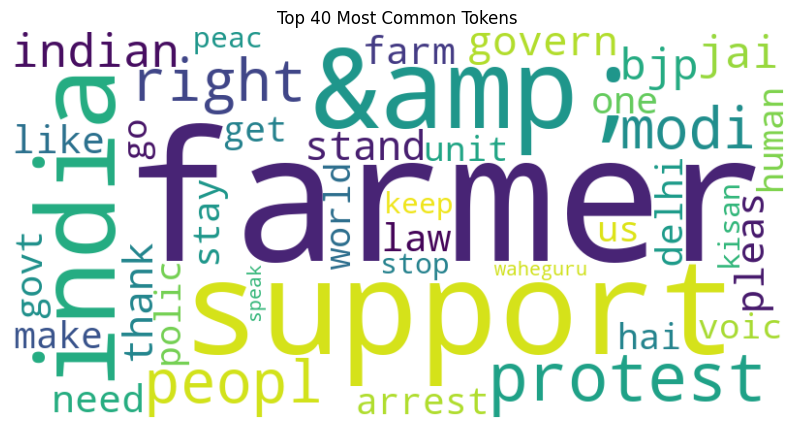

In [20]:

wordcloud = WordCloud(
    width=800,         # width of the word cloud
    height=400,        # height of the word cloud
    background_color='white',  # background color
    colormap='viridis',         # color scheme for the words
    max_words=100)
wordcloud.generate_from_frequencies(dict(list(filtered_tokens.items())[:40]))

plt.figure(figsize=(10,6))
plt.title(f"Top 40 Most Common Tokens")
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off') 

In [21]:
retweetsList = []
likesList = []

for tweet in processed_tweets:
    retweetsList.append(tweet['retweets'])
    likesList.append(tweet['likes'])

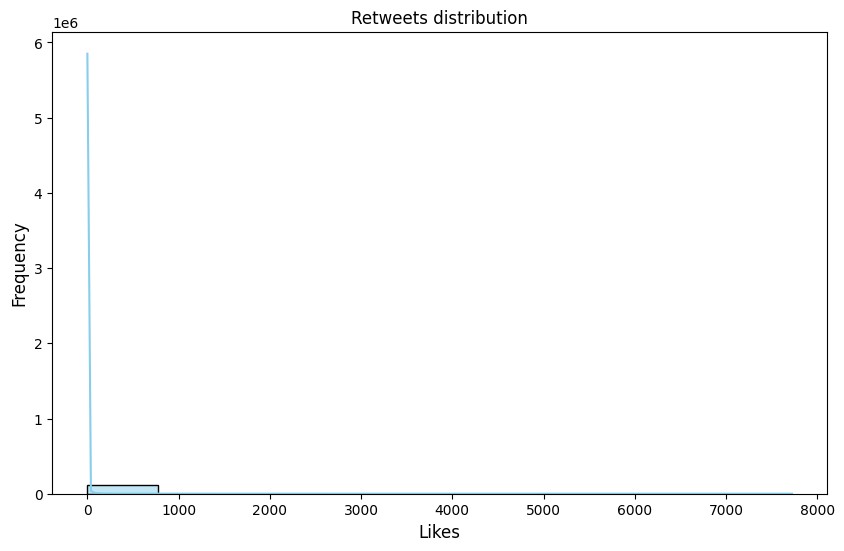

In [22]:
plt.figure(figsize=(10,6))
sns.histplot(retweetsList, bins=10, kde=True, color="skyblue")
plt.title(f"Retweets distribution")
plt.xlabel("Likes", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.show()

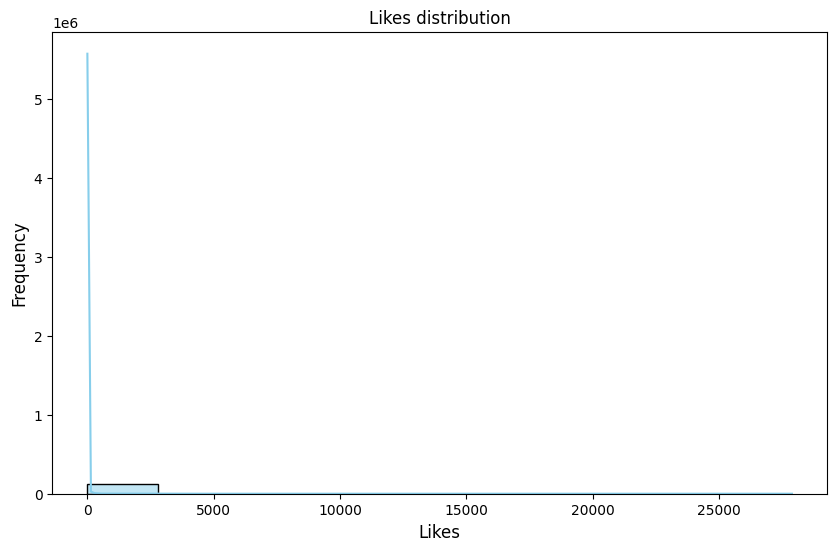

In [23]:
plt.figure(figsize=(10,6))
sns.histplot(likesList, bins=10, kde=True, color="skyblue")
plt.title(f"Likes distribution")
plt.xlabel("Likes", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.show()

This shows a extremely skewed distribution, were most values have low likes count but some viral ones get much greater values.

If we eliminate the outliers and focus on the main bulge we get the following distribution:

In [24]:
sorted_tweets_by_likes = sorted(processed_tweets, key=lambda item:item['likes'], reverse=True)
print('The most likef tweets are the following:')
for i in range(5):
    print('-------> Top', i + 1, 'tweet with ', sorted_tweets_by_likes[i]['likes'],' likes:')
    print(sorted_tweets_by_likes[i]['tweet'])
    print('-------> from user: ', sorted_tweets_by_likes[i]['userName'],'\n')

The most likef tweets are the following:
-------> Top 1 tweet with  27888  likes:
There's a #FarmersProtest happening in Germany.

But the German Govt didn’t block their path with barbed wires, dig highways or label them Anti-National. And neither did the Govt declare it an ‘internal matter’ where others can’t comment. I guess that’s how democracies work. https://t.co/pZtigTgWT8
-------> from user:  dhruv_rathee 

-------> Top 2 tweet with  25824  likes:
मध्यप्रदेश में निजी व्यापारी 200 करोड़ का धान खरीदकर भाग गया। किसान पैसे के लिए धरना दे रहे है।
अब भी बताना पड़ेगा काला क्या है
#FarmLaws #FarmersProtest #किसान_एकता_जिंदाबाद
-------> from user:  RakeshTikaitBKU 

-------> Top 3 tweet with  19284  likes:
लहरों को ख़ामोश देख कर ये ना समझना कि समंदर में रवानी नहीं , हम जब भी उठेंगे तूफ़ान बन कर उठेंगे , बस उठने की अभी ठानी नहीं ... #FarmersProtest                                        #JittegaKisaan
-------> from user:  sherryontopp 

-------> Top 4 tweet with  19198  likes:
हाँ मैं जान

In [25]:
likesList.sort(reverse=False)
likesList= np.array(likesList)

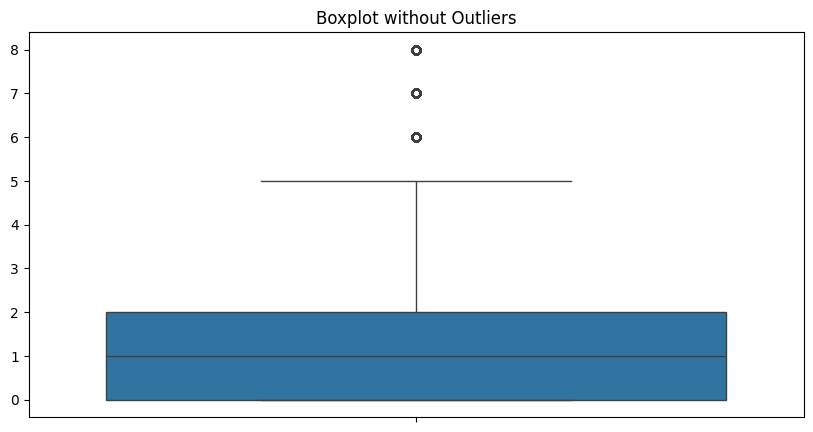

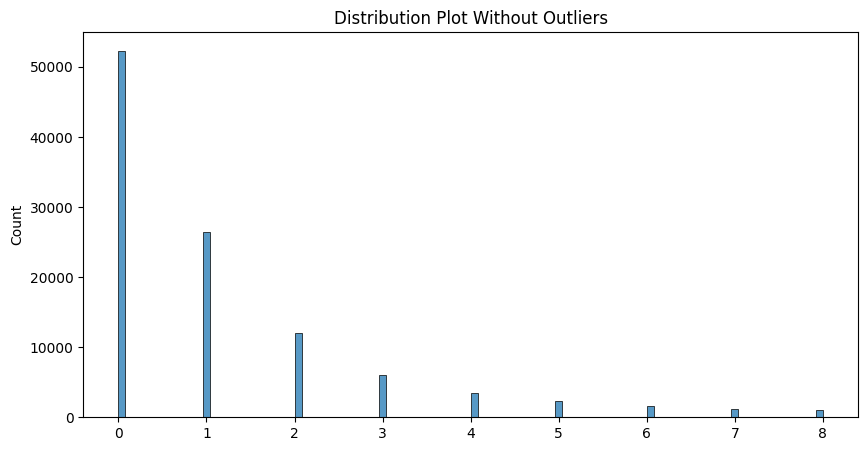

Cleaned Data (Without Outliers): [0 0 0 ... 8 8 8]


In [26]:
upper_bound = np.percentile(likesList, 90)
cleaned_data = likesList[(likesList <= upper_bound)]
plt.figure(figsize=(10, 5))
sns.boxplot(data=cleaned_data)
plt.title("Boxplot without Outliers")
plt.show()

plt.figure(figsize=(10, 5))
sns.histplot(cleaned_data, bins=100)
plt.title("Distribution Plot Without Outliers")
plt.show()

# Optional: Print cleaned data for confirmation
print("Cleaned Data (Without Outliers):", cleaned_data)

the distribution is still heavily skewed, and we can see that there are a large ammount of tweets without likes, we will then remove the tweets with less than 100 likes and see how the distribution looks like

In [27]:
no0likes = likesList[likesList > 100]

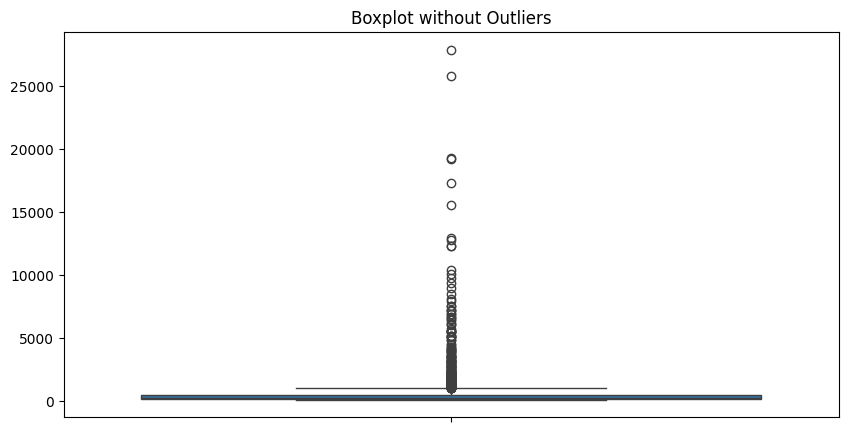

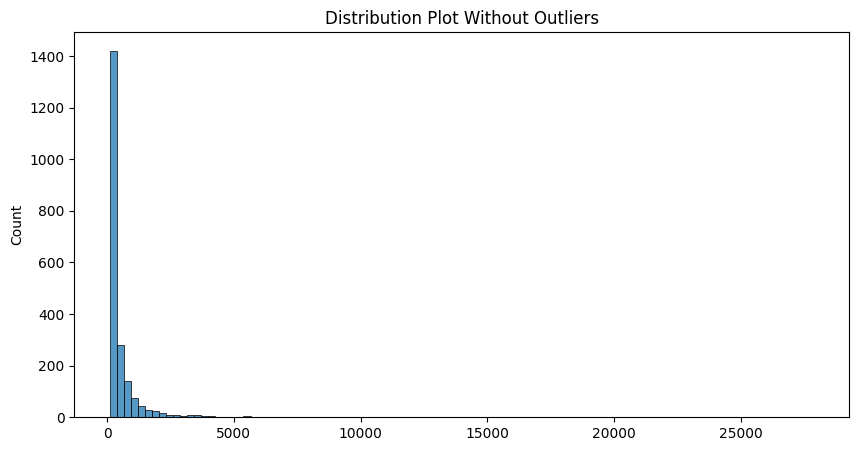

Cleaned Data (Without 0s): [  101   101   101 ... 19284 25824 27888]


In [28]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=no0likes)
plt.title("Boxplot without Outliers")
plt.show()

plt.figure(figsize=(10, 5))
sns.histplot(no0likes, bins=100)
plt.title("Distribution Plot Without Outliers")
plt.show()

# Optional: Print cleaned data for confirmation
print("Cleaned Data (Without 0s):", no0likes)

it is still hevily skewed, making the CDF distribution look like a logarithmic function

We will now do the same but for the number of retweets:

In [29]:
sorted_tweets_by_retweets = sorted(processed_tweets, key=lambda item:item['retweets'], reverse=True)
print('The most likef tweets are the following:')
for i in range(5):
    print('-------> Top', i + 1, 'tweet with ', sorted_tweets_by_retweets[i]['retweets'],' retweets:')
    print(sorted_tweets_by_retweets[i]['tweet'])
    print('-------> from user: ', sorted_tweets_by_retweets[i]['userName'],'\n')

The most likef tweets are the following:
-------> Top 1 tweet with  7723  retweets:
मध्यप्रदेश में निजी व्यापारी 200 करोड़ का धान खरीदकर भाग गया। किसान पैसे के लिए धरना दे रहे है।
अब भी बताना पड़ेगा काला क्या है
#FarmLaws #FarmersProtest #किसान_एकता_जिंदाबाद
-------> from user:  RakeshTikaitBKU 

-------> Top 2 tweet with  6164  retweets:
There's a #FarmersProtest happening in Germany.

But the German Govt didn’t block their path with barbed wires, dig highways or label them Anti-National. And neither did the Govt declare it an ‘internal matter’ where others can’t comment. I guess that’s how democracies work. https://t.co/pZtigTgWT8
-------> from user:  dhruv_rathee 

-------> Top 3 tweet with  4673  retweets:
disha ravi, a 21-year-old climate activist, has been arrested by delhi police for sharing a toolkit @GretaThunberg  posted in support of the #farmersprotest. 

disha’s arrest is alarming and the world needs to pay attention. #freedisharavi

https://t.co/IYGsLpNjwZ
-------> from u

we can see tha tsome of the most liked and retweeted coincide or are in close positions in both lists:

In [30]:
for i in range(10):
    print('-> Top', i + 1, 'tweet with most retweet, id:', sorted_tweets_by_retweets[i]['docNum'])
    print('-> Top', i + 1, 'tweet with most likes, id:  ', sorted_tweets_by_likes[i]['docNum'])
    print('\n')



-> Top 1 tweet with most retweet, id: doc_113632
-> Top 1 tweet with most likes, id:   doc_3203


-> Top 2 tweet with most retweet, id: doc_3203
-> Top 2 tweet with most likes, id:   doc_113632


-> Top 3 tweet with most retweet, id: doc_38410
-> Top 3 tweet with most likes, id:   doc_83874


-> Top 4 tweet with most retweet, id: doc_38012
-> Top 4 tweet with most likes, id:   doc_65353


-> Top 5 tweet with most retweet, id: doc_46206
-> Top 5 tweet with most likes, id:   doc_46206


-> Top 6 tweet with most retweet, id: doc_27071
-> Top 6 tweet with most likes, id:   doc_62412


-> Top 7 tweet with most retweet, id: doc_45142
-> Top 7 tweet with most likes, id:   doc_45142


-> Top 8 tweet with most retweet, id: doc_83874
-> Top 8 tweet with most likes, id:   doc_96125


-> Top 9 tweet with most retweet, id: doc_65353
-> Top 9 tweet with most likes, id:   doc_88771


-> Top 10 tweet with most retweet, id: doc_62412
-> Top 10 tweet with most likes, id:   doc_38262




In [31]:
retweetsList.sort(reverse=False)
retweetsList= np.array(retweetsList)

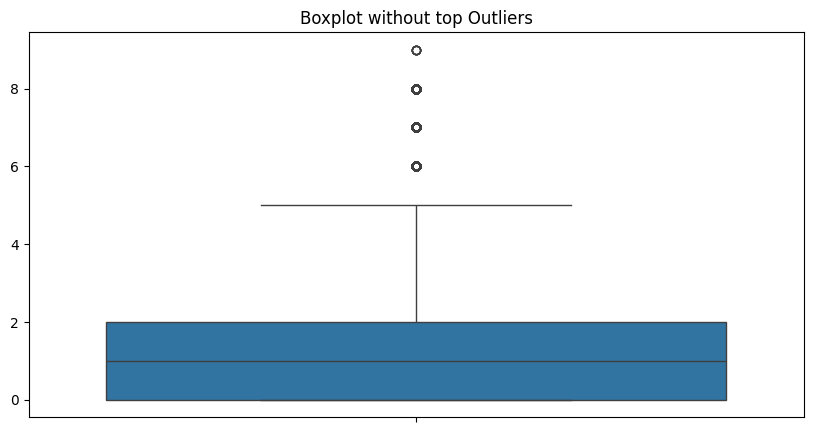

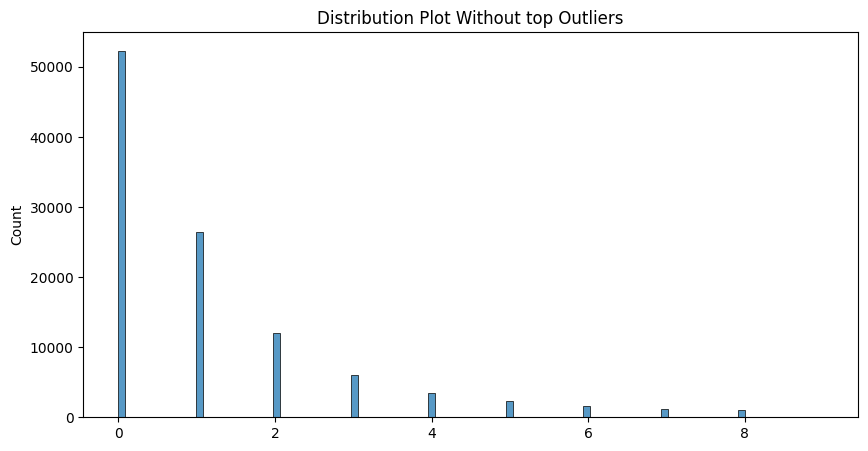

Cleaned Data (Without top Outliers): [0 0 0 ... 9 9 9]


In [32]:
upper_bound = np.percentile(retweetsList, 90)
cleaned_data = likesList[(retweetsList <= upper_bound)]
plt.figure(figsize=(10, 5))
sns.boxplot(data=cleaned_data)
plt.title("Boxplot without top Outliers")
plt.show()

plt.figure(figsize=(10, 5))
sns.histplot(cleaned_data, bins=100)
plt.title("Distribution Plot Without top Outliers")
plt.show()

# Optional: Print cleaned data for confirmation

print("Cleaned Data (Without top Outliers):", cleaned_data)

like in the likes count there are a lot with 0s, we should 

In [33]:
no0retweets = retweetsList[retweetsList > 0]

In [34]:
no0retweets

array([   1,    1,    1, ..., 4673, 6164, 7723])

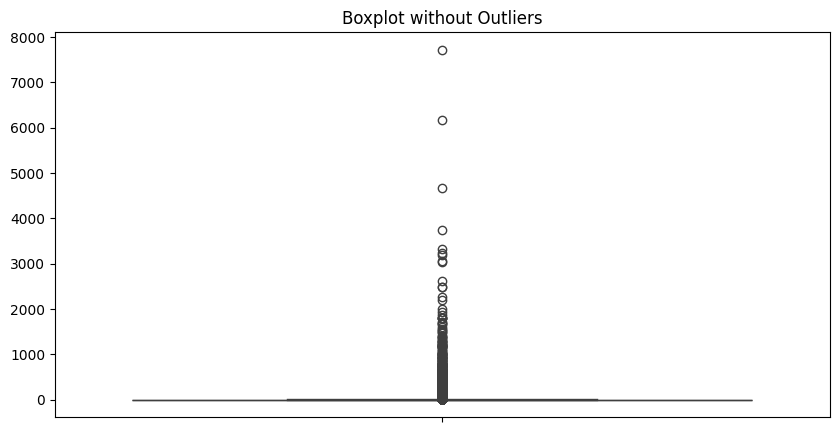

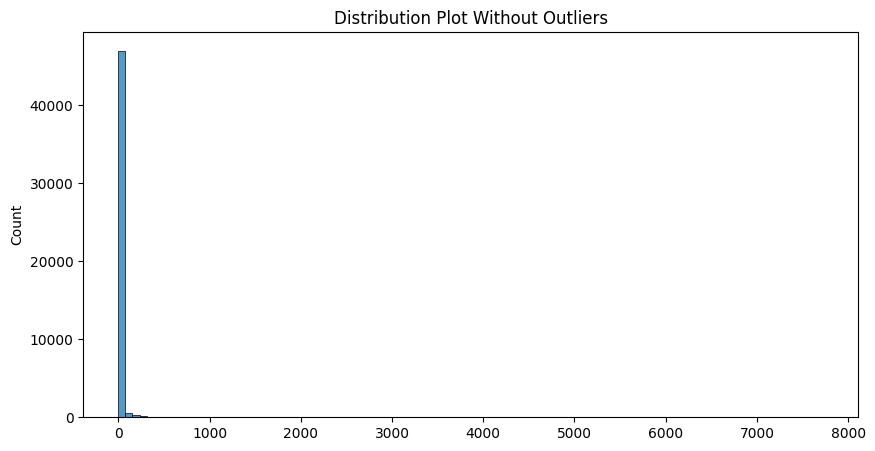

Cleaned Data (Without 0s): [   1    1    1 ... 4673 6164 7723]


In [35]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=no0retweets)
plt.title("Boxplot without Outliers")
plt.show()

plt.figure(figsize=(10, 5))
sns.histplot(no0retweets, bins=100)
plt.title("Distribution Plot Without Outliers")
plt.show()

# Optional: Print cleaned data for confirmation
print("Cleaned Data (Without 0s):", no0retweets)